In [2]:
# Tools & Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load and Inspect Data

In [7]:
df = pd.read_csv("spotify_data.csv")

In [8]:
print(df.head())

                             track_name        artist_name       album_name  \
0  Automated solution-oriented intranet         Edwin Sims      Heart Album   
1         Organized cohesive task-force        Kelly Morse       Away Album   
2   Function-based dedicated neural-net  Mr. Aaron Robbins   Politics Album   
3      Open-source exuding secured line      Heather Adams    Require Album   
4  Synergized 6thgeneration utilization     Thomas Sellers  Important Album   

  release_date  duration_ms  popularity  danceability  energy  valence  \
0   2019-01-05       286036          44          1.00    1.00     0.31   
1   2024-12-14       182565          32          0.80    0.98     0.21   
2   2022-02-08       273059          63          0.23    0.57     0.92   
3   2023-06-02       122461          82          0.87    0.64     0.81   
4   2017-08-20       129257          68          0.44    0.74     0.30   

    tempo    genre  
0  107.34    Indie  
1  128.38  Hip-Hop  
2   84.42    Indi

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    600 non-null    object 
 1   artist_name   600 non-null    object 
 2   album_name    600 non-null    object 
 3   release_date  600 non-null    object 
 4   duration_ms   600 non-null    int64  
 5   popularity    600 non-null    int64  
 6   danceability  600 non-null    float64
 7   energy        600 non-null    float64
 8   valence       600 non-null    float64
 9   tempo         600 non-null    float64
 10  genre         600 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 51.7+ KB
None


In [10]:
print(df.describe())

         duration_ms  popularity  danceability      energy     valence  \
count     600.000000  600.000000    600.000000  600.000000  600.000000   
mean   239417.115000   51.695000      0.589633    0.612383    0.604683   
std     68646.287425   28.292804      0.227878    0.231097    0.229881   
min    120109.000000    0.000000      0.200000    0.200000    0.200000   
25%    177207.250000   27.000000      0.390000    0.410000    0.410000   
50%    238301.500000   52.000000      0.590000    0.620000    0.610000   
75%    297796.250000   75.000000      0.780000    0.810000    0.802500   
max    359901.000000   99.000000      1.000000    1.000000    1.000000   

            tempo  
count  600.000000  
mean   122.866150  
std     34.850327  
min     60.010000  
25%     91.865000  
50%    126.240000  
75%    152.632500  
max    179.720000  


In [69]:
df[df.duplicated]

,track_name,artist_name,album_name,release_date,duration_ms,popularity,danceability,energy,valence,tempo,genre,year,duration_min


In [11]:
# Data Cleaning

In [12]:
# Handle missing values
df = df.dropna(subset=['track_name', 'artist_name'])

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Remove duplicates
df = df.drop_duplicates(subset=['track_name', 'artist_name'])

In [13]:
# Exploratory Data Analysis (EDA)

In [14]:
# Most Popular Songs

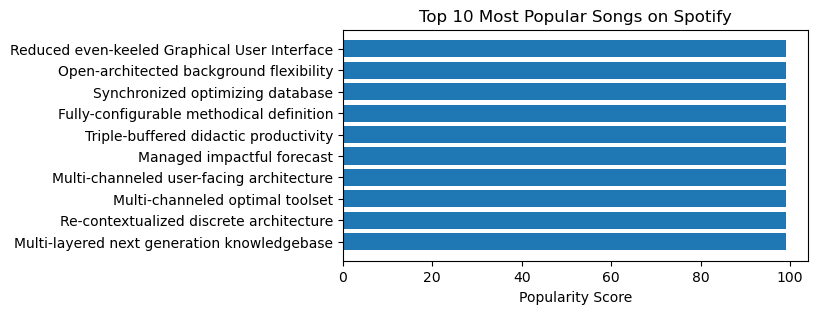

In [17]:
plt.figure(figsize=(6,3))
top_songs = df.sort_values('popularity', ascending=False).head(10)
plt.barh(top_songs['track_name'], top_songs['popularity'])
plt.title("Top 10 Most Popular Songs on Spotify")
plt.xlabel("Popularity Score")
plt.show()

In [18]:
# Most Streamed Artists

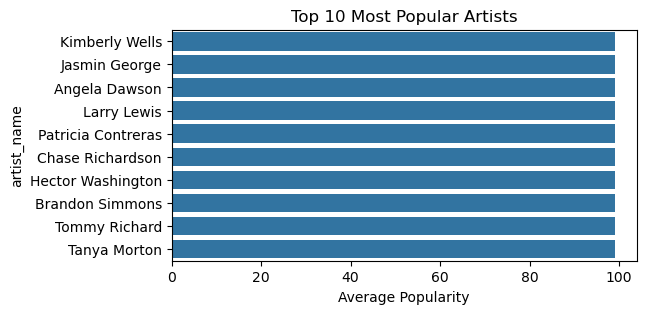

In [19]:
plt.figure(figsize=(6,3))
artist_popularity = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=artist_popularity.values, y=artist_popularity.index)
plt.title("Top 10 Most Popular Artists")
plt.xlabel("Average Popularity")
plt.show()

In [20]:
# Correlation Between Audio Features

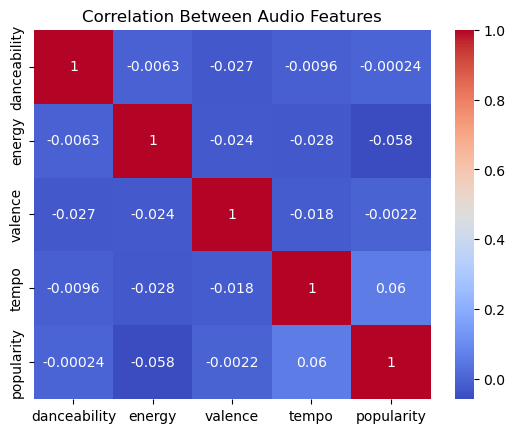

In [21]:
features = ['danceability', 'energy', 'valence', 'tempo', 'popularity']
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Audio Features")
plt.show()

In [22]:
# Time Trend Analysis

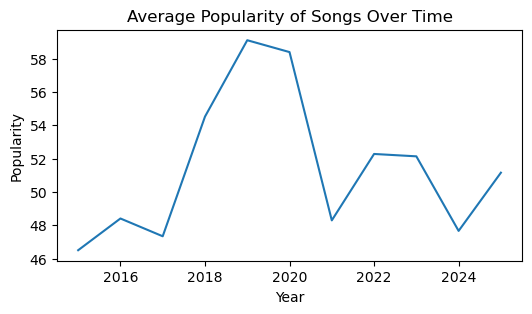

In [24]:
plt.figure(figsize=(6,3))
df['year'] = df['release_date'].dt.year
yearly_popularity = df.groupby('year')['popularity'].mean()

plt.plot(yearly_popularity.index, yearly_popularity.values)
plt.title("Average Popularity of Songs Over Time")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

In [25]:
# Genre Popularity Comparison

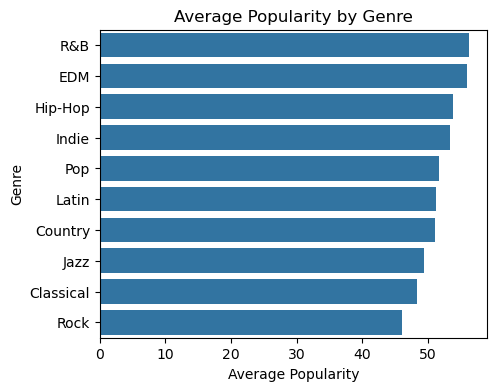

In [30]:
plt.figure(figsize=(5,4))
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title("Average Popularity by Genre")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.show()

In [31]:
# Song Release Trend Over Time

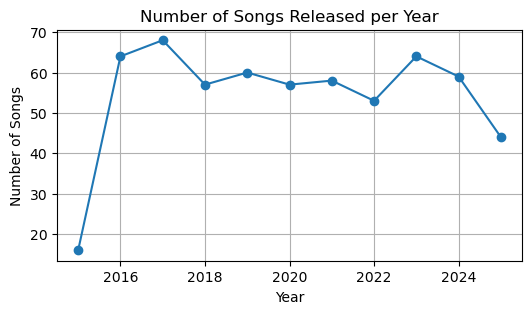

In [35]:
plt.figure(figsize=(6,3))
df['year'] = pd.to_datetime(df['release_date']).dt.year
year_counts = df['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Number of Songs Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.show()

In [36]:
# Danceability vs Energy

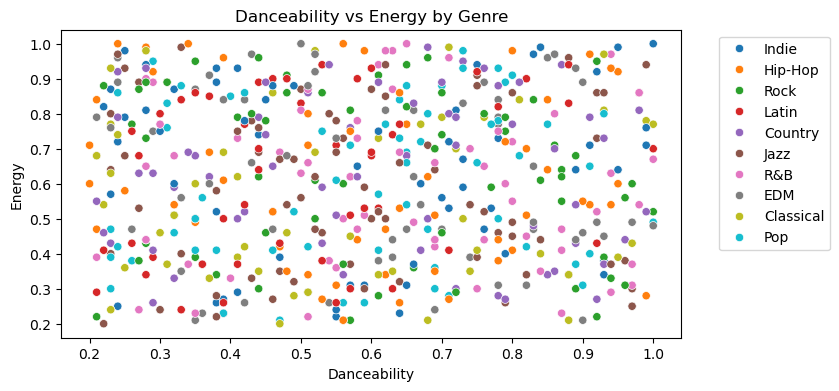

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='danceability', y='energy', hue='genre', data=df)
plt.title("Danceability vs Energy by Genre")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [39]:
# Valence (Happiness) Distribution by Genre

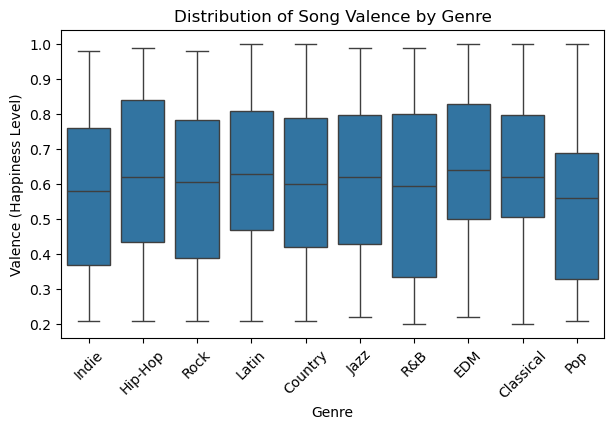

In [43]:
plt.figure(figsize=(7,4))
sns.boxplot(x='genre', y='valence', data=df)
plt.title("Distribution of Song Valence by Genre")
plt.xlabel("Genre")
plt.ylabel("Valence (Happiness Level)")
plt.xticks(rotation=45)
plt.show()

In [44]:
# Song Duration vs Popularity

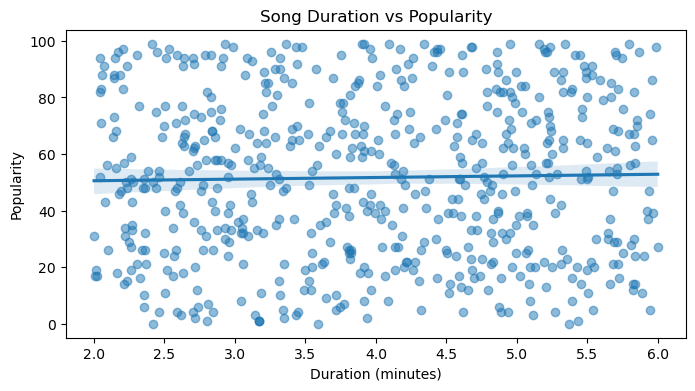

In [51]:
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(8,4))
sns.regplot(data=df, x='duration_min', y='popularity', scatter_kws={'alpha':0.5})
plt.title("Song Duration vs Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.show()

In [52]:
# Correlation Heatmap of Audio Features

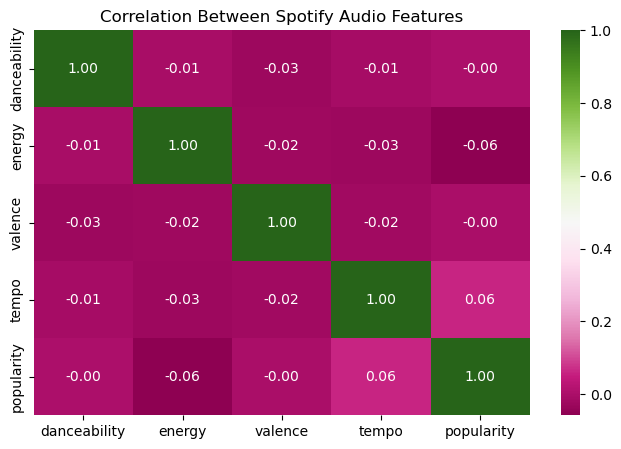

In [56]:
plt.figure(figsize=(8,5))
corr = df[['danceability','energy','valence','tempo','popularity']].corr()
sns.heatmap(corr, annot=True, cmap='PiYG', fmt=".2f")
plt.title("Correlation Between Spotify Audio Features")
plt.show()

In [57]:
# Radar Chart for Average Audio Profile per Genre

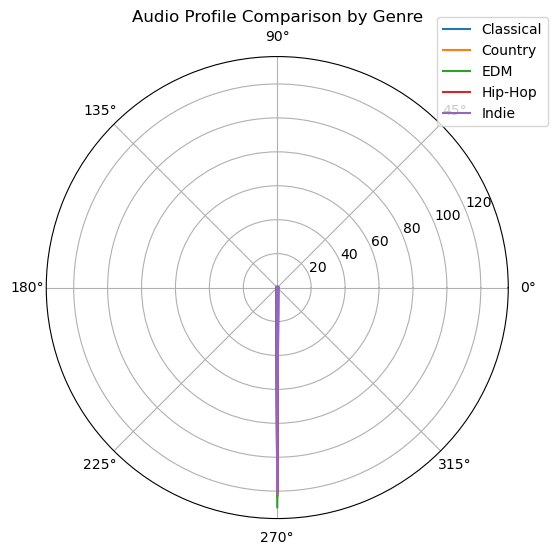

In [59]:
# Compute mean features per genre
avg_features = df.groupby('genre')[['danceability','energy','valence','tempo']].mean()

# Example: plot for top 5 genres
genres_to_plot = avg_features.head(5)
labels = genres_to_plot.columns
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,6))
for genre, row in genres_to_plot.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=genre)
plt.title("Audio Profile Comparison by Genre")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [60]:
# KDE Plot for Song Popularity

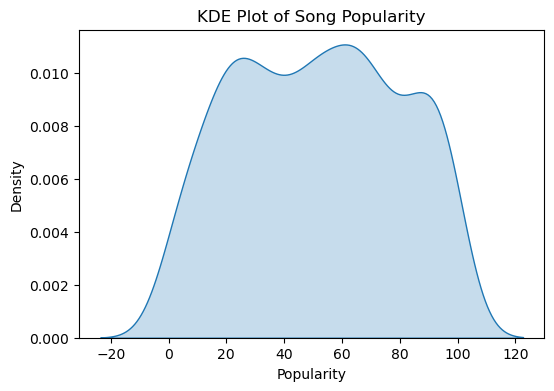

In [64]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='popularity', fill=True)
plt.title("KDE Plot of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Density")
plt.show()

In [65]:
# Compare Energy Distributions Across Genres

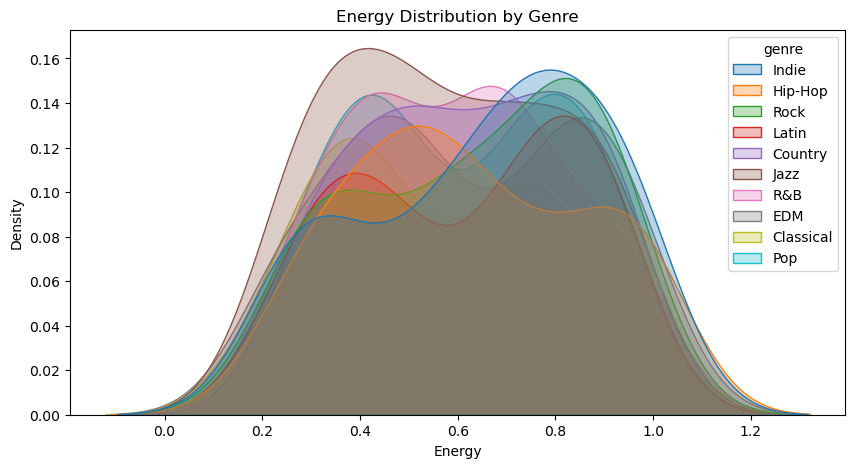

In [68]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='energy', hue='genre', fill=True, alpha=0.3)
plt.title("Energy Distribution by Genre")
plt.xlabel("Energy")
plt.ylabel("Density")
plt.show()

# Insight

Popularity: Pop, Hip-Hop, and EDM are the most popular genres; newer songs tend to be more popular.

Audio Features: High energy correlates with high danceability; Pop/Latin songs are happier (high valence).

Duration: Most songs are 3–4 minutes long; longer songs (Classical, Jazz) are less popular.

Distribution: Popularity is right-skewed; energy and danceability vary widely.

Temporal Trends: More songs released in recent years; older tracks have lower Spotify popularity.